<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Introduction to Unsupervised Machine Learning and Clustering Algorithms
This notebook provides an overview of unsupervised machine learning (ML), specifically clustering algorithms.

# Table of Contents
[Python Libraries in this Notebook](#Python-Libraries-in-this-Notebook)

[Machine Learning](#Machine-Learning)

[Unsupervised Machine Learning](#Unsupervised-Machine-Learning)

[Clustering Algorithms](#Clustering-Algorithms)

[Dimensionality Reduction](#Dimensionality-Reduction)

[Other Considerations and Special Cases](#Other-Considerations-and-Special-Cases)

[Common Pitfalls and Recommended Practices](#Common-Pitfalls-and-Recommended-Practices)

[Example: Random Data](#Example:-Random-Data)

- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

- [Preparing Data for Clustering](#Preparing-Data-for-Clustering)

- [K-Means and DBSCAN Clustering Algorithms](#K-Means-and-DBSCAN-Clustering-Algorithms)

- [K-Means Clustering Algorithm](#K-Means-Clustering-Algorithm)

    - [Optimal Number of Clusters](#Optimal-Number-of-Clusters)

    - [Clustering with K-Means](#Clustering-with-K-Means)

- [DBSCAN Clustering Algorithm](#DBSCAN-Clustering-Algorithm)

    - [Optimal EPS](#Optimal-EPS)

    - [Clustering with DBSCAN](#Clustering-with-DBSCAN)

[Concluding Remarks](#Concluding-Remarks)

# Python Libraries in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1' # Resolves warning on KMeans memory leak. Needs to be done before importing KMeans.

#### Note on the above cell:
Note that on Windows computers you may get a memory leak warning. To solve this use the following solution: https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

A memory leak is a situation in computer science that occurs when a reseource that was initailly used by a computer is not being released by the system after it is not needed.

In [2]:
# imports
import pandas as pd
import numpy as np
from numpy import unique

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN # K-Means and DBSCAN algorithms
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score # Metrics 
from sklearn.neighbors import NearestNeighbors # Function to calculate distance to nearest neighbor points
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Scaling functions
from sklearn.datasets import make_blobs

# Defining Notebook Default Settings

In [3]:
pd.set_option('display.max_colwidth', None) # PD has a limit of 50 characters.  Removes limit and uses the full text.
pd.options.display.float_format = "{:.4f}".format # Sets PD to displays float numbers as 4 decimal places.
plt.style.use('tableau-colorblind10') # Sets MatPlotLib default color style to 'tableau-colorblind10'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Colors cycling.

# Machine Learning
[Return to Table of Contents](#Table-of-Contents)

In previous lecture we had defined various topics within machine learning. Common applications and tasks included supervised machine learning tasks (e.g., classification task, time series prediction and forecasting), unsupervised machine learnign (e.g., clustering), information retrieval (e.g., using similarity searching), topic modeling (e.g., using LDA to extract insights from text or speech data), network analysis (e.g., visualizing relationship between recordrs), and other AI/ML applications. This notebook will focus specifically on unsupervised machine learning and clustering algorithms.

# Unsupervised Machine Learning
[Return to Table of Contents](#Table-of-Contents)

In unsupervised ML, an algorithm finds patterns in the data without using labeled data for training the model. The unsupervised ML is used to analyze and cluster unlabled dataset, discover similarities, find hidden patters, find outliers, etc. The main algorithms under unsupervised ML are called clustering algorithms. In summary, clustering algorithms find patters in the data and create groups or clusters of the records or datapoints. The clusters can then be analyzed as a group based on the cluster characteristics. Example applications of clustering include customer segmentation (e.g., target ads or marketing), recommendation systems, anomaly or outlier detection, data transformation for classification/labeling.

There are various data considerations that may affect unsupervised machine learning and selection of algorithms. These include:
1. Do I understand the shape of the data and potential clusters that will form? 
2. Is there overlap between clusters?
3. Do I need to identify outliers?
4. Is the data continous or binary (e.g., categorical)?
5. Is the data high dimensional and do I need to use dimensionality reduction?
6. Do I need to scale the data?
7. Should I use a centroid-based or density-based clustering algorithm?

In cases there may also a data scientist may combine various methods or algorithms. For example, when using clustering algorithms with text data (i.e., where each term or word is a dimension), it may be beneficial to apply dimensionality reduction first and then run the clustering algorithm. The Data Science Example, notebook "7_Data_Analysis_Dashboards.ipynb", dashboard tab on Text Modeling, provides an example of how text clustering can use PCA, TSNE and no dimensionality reduction. 

### Clustering Algorithms
[Return to Table of Contents](#Table-of-Contents)

There are about a dozen clustering algorithms including but not limited to K-Means, DBSCAN, OPTICS, meanshift, etc. The SciKit Learn Library documentation has example on these and other algorithms (https://scikit-learn.org/stable/modules/clustering.html). These algorithm rely on distance metrics to calculate or measure how similar a datapoint is to neighboring datapoints determine its cluster. There are two main types of centroid-based and density-based. 

In centroid-based algorithm (e.g., K-Means) a point is used to initialize the clusters and through an iterative process the distance between all points and the centroid of each cluster is minimized.

In desnsity-based algorithms (e.g., DBSCAN, OPTICS, etc.), the algorithm picks one point and iterates through adjacent neighbor points verifying that the distance of the initial and adjacent points meet the distance value (i.e., called Epsilon or EPS). Once all adjacent points that are within the value of EPS are determined, the algorithm verifies that the minimum samples in a clusters is met and if met this creates a cluster. Then it continues to iterates through other data points. 

### Dimensionality Reduction
[Return to Table of Contents](#Table-of-Contents)

Other examples of unsupervised ML algorithms include dimensionality reduction. These are used to create convert a high dimensionality problem into a lower dimensionality problem by creating a lower dimension projection (e.g., reduce the dimensions from 3D to 2D). Example algorihtms include [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), [T-distributed Stochastic Neighbor Embedding (TSNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [singular value decomposition (SVD)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), among others. With high dimensional data (e.g., text), applying dimensionality reduction (e.g., PCA or TSNE) may improve the performance of AI/ML models.

Other Unsupervised ML References:
- https://machinelearningmastery.com/clustering-algorithms-with-python/

# Other Considerations and Special Cases
[Return to Table of Contents](#Table-of-Contents)

- When clustering two features were one is binary (e.g., 0 or 1, male/female, etc.) and the other is contionous (e.g., numbers), the clustering algorithm in most cases will cluster or group by the binary classes. In this case clustering algorithm may provide more useful clusters if the algorithm uses two or more binary features (i.e., one feature with contionous data and two features with binary data).

- Clustering algorithms have been found to fall apart when used with high dimensional data (e.g., greater than three dimensions) and best practices is to apply diemensionality reduction algorithm and methods before clustering. It is recommended to perform a sensitivy study and evaluate the effects of algorithm combination (e.g., clustering algorithm with/without dimensionality reduction) for each use case.

# Common Pitfalls and Recommended Practices
[Return to Table of Contents](#Table-of-Contents)

SciKit Learn User's guide documentation has a good article on common pitfalls and recommended practices when using machine learning algorithms. This article is worth reading and discusses in more detail the topics of inconsistent preprocessing, data leakage, and controlling randomness.

Documentation References:
- https://scikit-learn.org/stable/user_guide.html
- https://scikit-learn.org/stable/common_pitfalls.html

# Example: Random Data
[Return to Table of Contents](#Table-of-Contents)

The example below uses the make_blobs to create random or synthetic data. Using the following parameters can produce synthetic data to explore various situations in clustering. All of them use the following make_blobs parameters n_features = 2, and center_box = (10, 30). The 
- 3 Clusters: Change make_blobs parameters centers = 3 and random_state as specified below
    - random_state = 1: Produces 3 separable clusters 
    - random_state = 2: Produces 1 cluster that does not overlap and two clusters that seem to have some overlap.
- 2 Clusters:
    - randome_state = 2: Produces 2 separate clusters with no overlap.
    - randome_state = 4: Produces 2 clusters with overlap which almost look like one cluster.
    - randome_state = 12: Produces 2 clusters with some overlap. 

Note that the output of blobs is X variable whcih produces two  is two dimensional array of the defined n_samples. The L variable in the output is the the Label of the "blob" or cluster.

In [4]:
# Use the make_blobs function to create a 2-dimensional synthetic dataset
X, L = make_blobs(n_samples=1000, centers=3, n_features=2, center_box = (10, 30), random_state = 2)
df_data = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=L))
print(f'The dataframe has {df_data.shape[0]} rows.')
df_data.head(5)

The dataframe has 1000 rows.


,x,y,label
0,19.4473,18.0875,2
1,18.4589,16.5638,2
2,18.1724,14.4368,2
3,19.1031,10.1015,0
4,20.7778,18.2620,1


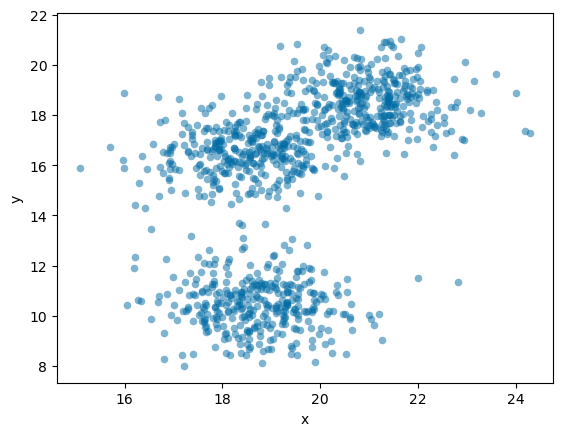

In [5]:
# Let's visualize our data in Scatter plot
plt.scatter(df_data['x'], 
            df_data['y'],
            marker='o', s=30, lw=0, alpha=0.5, c=None, edgecolor=None)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# Note that the data is not scaled and could potentially improve the results in some cases.

#### Question:
If you were to visually separate the datapoints in the scatter plot above into clusters or groups, how would you divide the data point?

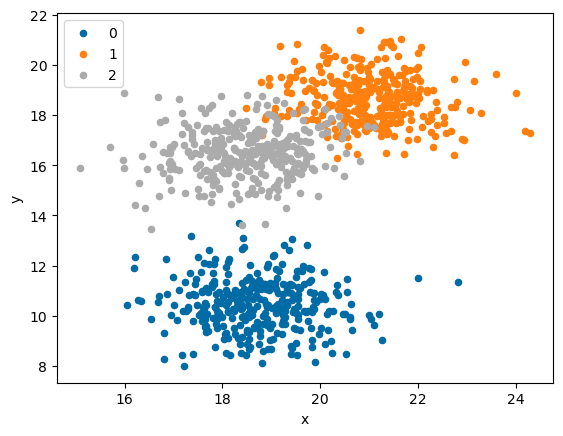

In [6]:
# Let's visualize our data and put some color on the clusters assigned by make_blobs Labels.
# Note that when make_blobs function assigned the "blobs" or clusters there are some that have overlap.
fig, ax = plt.subplots()
grouped = df_data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show();

However, assigning the clusters from the make_blobs is an after the fact. Using a clustering algorithm will evaluate each datapoint and assign a cluster as defined by a data scientist. Let's explore how to do this below. 

Note that if you have too many clusters you may need to adjust the colors as there may be more clusteres than colors and the color map repeats the colors in those cases.

## Exploratory Data Analysis (EDA)
[Return to Table of Contents](#Table-of-Contents)

Using the functions .info(), .describe(), .hist(), .pairplot(), and .corr() are always useful to explore and better understand your data. These functions always provide useful information regardless of the type of analysis or model that you will be working on. They can help in identifying issues that can be addressed thru data cleaning (e.g., unexpected feature datatype, outliers, ), identifying features that may be worth visualizing in plots and charts, identify features that can be used for clustering or that may have clusters, identify features that have outliers, and help in developing drill down and define the focus of an analysis.

In [7]:
df_data.info() # Histogram for the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   label   1000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 19.7 KB


In [8]:
df_data.describe()

,x,y,label
count,1000.0000,1000.0000,1000.0000
mean,19.3998,15.1947,0.9990
std,1.5069,3.6079,0.8171
min,15.0805,8.0031,0.0000
25%,18.2848,11.0815,0.0000
50%,19.2488,16.4894,1.0000
75%,20.5308,18.0791,2.0000
max,24.3039,21.3861,2.0000


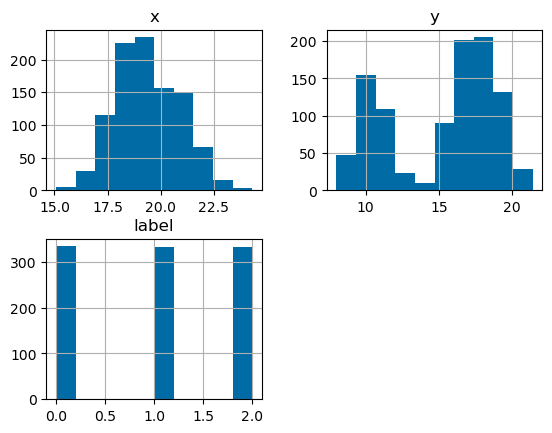

In [9]:
df_data.hist(); # Histogram for the data.
# Note that the y plot in the case for centers=3 and random_state=2 shows to potential clusters in the count of y-value.

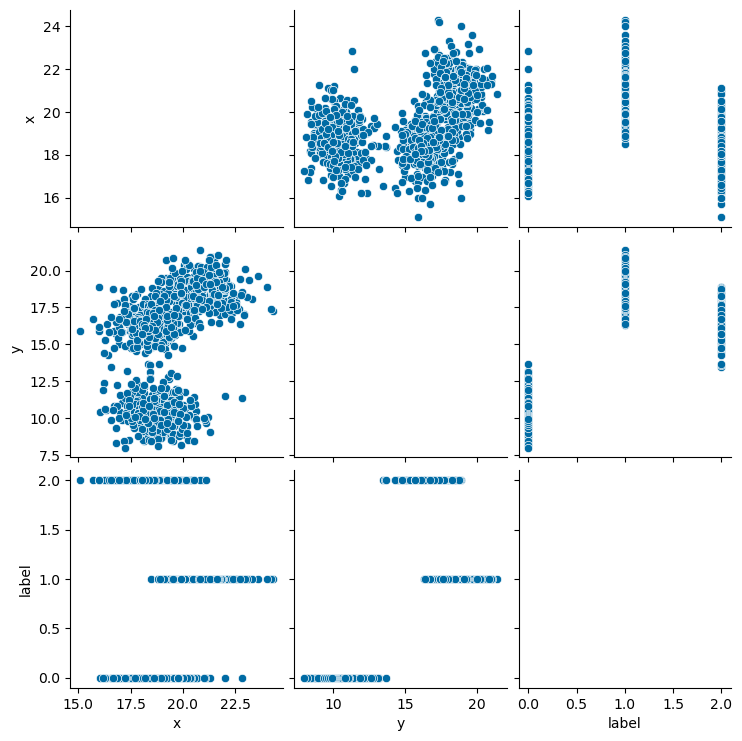

In [10]:
sns.pairplot(df_data, diag_kind = False);

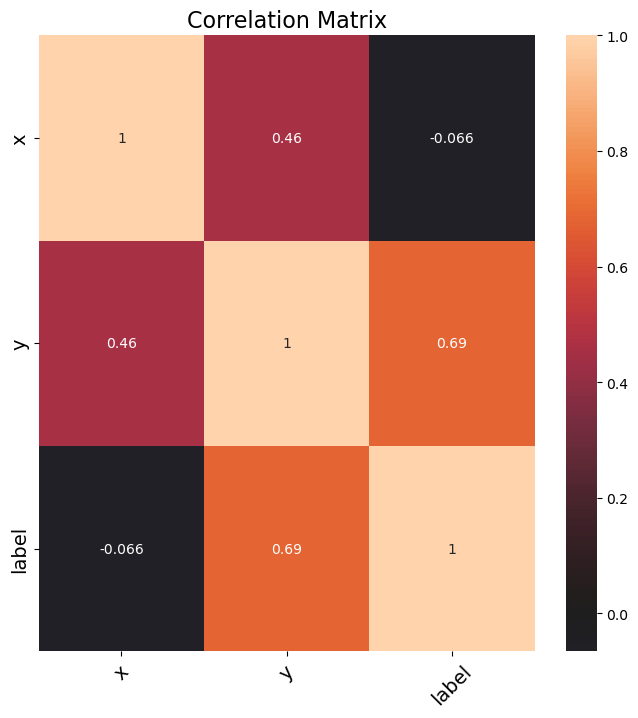

In [11]:
# Correlation Plot
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix', fontsize=16);
sns.heatmap(df_data.corr(),annot=True, center=0);

## Preparing Data for Clustering
[Return to Table of Contents](#Table-of-Contents)

The data input to a clustering algorithm requires the data to be an array-like. In many cases the results will be improved if the input data is also scaled. In this section we will scale the values in the df_data dataframe and extract the values as an array. Note that we can run all the functions in the EDA with the scaled data too or we can first scale the data and then run the EDA functions. We could have also done this step at the beginning when loading the data.

In [12]:
# Let's create a new dataframe that has the scaled data.
# Recall that there are various scaling methods.
df_data_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_data.values), columns=df_data.columns, index=df_data.index)
df_data_scaled.head(5)

,x,y,label
0,0.4734,0.7535,1.0000
1,0.3663,0.6397,1.0000
2,0.3352,0.4807,1.0000
3,0.4361,0.1568,0.0000
4,0.6177,0.7666,0.5000


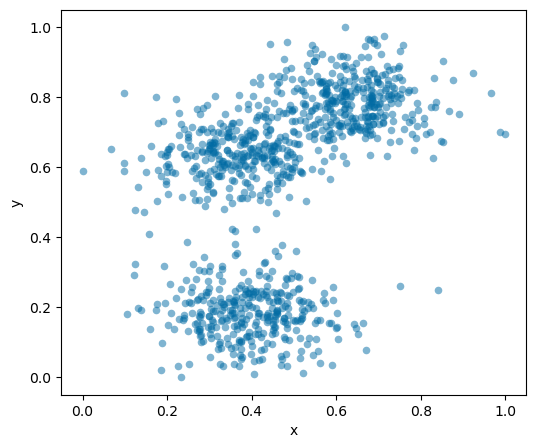

In [13]:
# Let's visualize our data in Scatter plot of the scaled data.
plt.figure(figsize=(6,5)) # With scaled data is better to have the plot figsize x/y axes be equal to avoid visual distortion.
plt.scatter(df_data_scaled['x'], 
            df_data_scaled['y'],
            marker='o', s=30, lw=0, alpha=0.5, c=None, edgecolor=None)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# Note that the data is not scaled and could potentially improve the results in some cases.

In [14]:
# Converting the values in the dataframe to an array which will be used as input to other functions.
df_scaled_array = df_data_scaled[['x', 'y']].to_numpy()
df_scaled_array

array([[0.47344477, 0.75352724],
       [0.36628377, 0.63966823],
       [0.33522619, 0.48074106],
       ...,
       [0.20395799, 0.65098559],
       [0.48274916, 0.95824097],
       [0.33767436, 0.14388626]])

## K-Means and DBSCAN Clustering Algorithms
[Return to Table of Contents](#Table-of-Contents)

In the example below we will be clustering data based on two features only (X and y). We will be using KMeans clustering algorithm whcih is a centroid-based algorithm and we will be using Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering algorithm which is a density-based algorithm. We will discuss how to input data into the clustering algorithm as well as extracting the assigned clusters for each record in the data.

Note that we will only be using two dimensions to show how the cluster works. However, the algorithms can accept as many dimensions as given. Higher dimensions will be more difficult if not impossible to visualize. Also recall that with higher dimensions clustering algorithms tend to fall apart.

Documentation References:
- [SKLearn Clustering Algorithms](https://scikit-learn.org/stable/modules/clustering.html)
- [KMeans Clustering ALgorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [DBSCAN Clustering Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [Popular Clustering Algorithms](https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29)

## K-Means Clustering Algorithm
[Return to Table of Contents](#Table-of-Contents)

K-Means is one of the most used clustering algorihtms. It is a centroid based clustering algorithm. A few characterstics of K-Means outputs are as follows:
- Resulting clusters are linearly separable
- Data will always be assigned one cluster and will not identify outliers unless they form a cluster.

### Optimal Number of Clusters
[Return to Table of Contents](#Table-of-Contents)

When using centroid based clustering algorithms one input that these algorithms require is for the user to define number of clusters. Even though the algorithms will accept any number of clusters to be calculated, an initial approach may be to calculate the optimal number of clusters. There are various mathematical methods to estimate the optimal number of clusters, two most common are:
- Elbow Method: Calculation of Cluster score and use the inflection (i.e., elbow) of the plot to decide the most optimal number of clusters.
- Silhoutte Coefficient Method: Calculatest the Silhoutte score and the number of clusters with the highest score is the most optimal number. 

In both methods the the algorithm iterates thru a specified number of expected clusters and calculates the score for each cluster which is then plotted. Note that if we will use the functions various times or deploy them it makes sense to create a  defined function with the code.

Note that on Windows computers you may get a memory leak warning. To solve this use the following solution: https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [15]:
# Code Calculates the Elbow Score and Silhoutte Coefficient to calculate the most optimal cluster number.


K = range(2, 21) # Defining the range of the minimum and maximum expected number of clusters.
km_scores= [] # Empty list for cluster scores.
km_silhouette = [] # Empty list for silhoutte scores.

for i in K: # Iterating from 2 to 10 clusters)
    km = KMeans(n_clusters=i, n_init = 'auto', random_state = 42).fit(df_scaled_array) # Calculating the Clusters in the df_scaled_array data.
    preds = km.predict(df_scaled_array) # Predicted clusters
    km_scores.append(-km.score(df_scaled_array)) # Use "-km.score" to calculate score and append to list of scores.
    
    silhouette = silhouette_score(df_scaled_array, preds) # Use "silhoutte_score" to calculate score 
    km_silhouette.append(silhouette) # Appends silhoutte score to list.

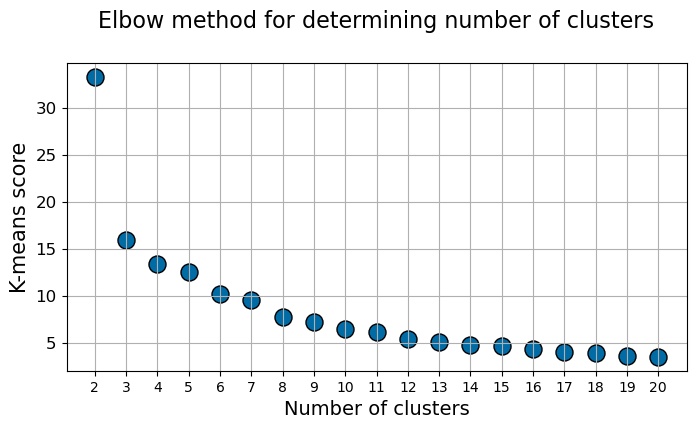

In [16]:
# Plot the Elbow using K-means score
plt.figure(figsize=(8,4))
plt.title("Elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in K],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in K],fontsize=10)
plt.yticks(fontsize=12)
plt.show()

Looks like in this case the inflection (e.g., elbow) may be at 3 clusters. One challenge with the Elbow method is that it is sometimes difficult to visualize and make a decision, especially if the most optimal number of clusters is 2 since there would be no inflection that we can visualize.

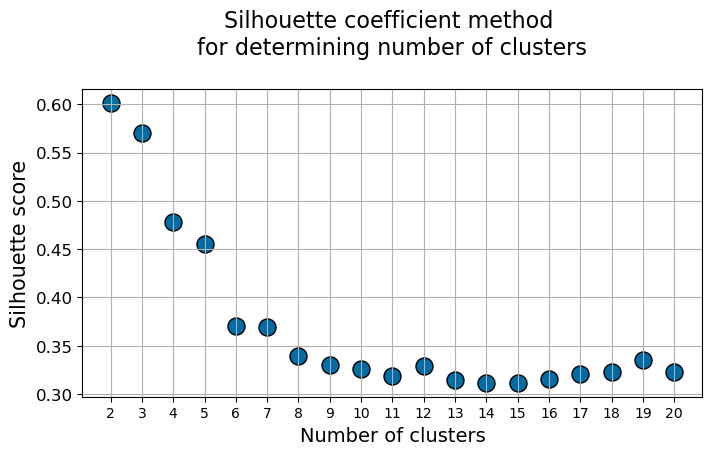

In [17]:
# Plot the Silhoutte Scores
plt.figure(figsize=(8,4))
plt.title("Silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in K],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in K],fontsize=10)
plt.yticks(fontsize=12)
plt.show()

The silhoutte method shows tha the optimal number of clusters is 2 clusters. However, 3 clusters can also be considered as both scores are very close. We can now use either 2 clusters or 3 clusters when calculating the KMeans clusters.

### Clustering with K-Means
[Return to Table of Contents](#Table-of-Contents)

The code in this section uses K-Means algorithm to create the clusters and plot the data. As a user the main parameter that we need to define when using K-Means is the number of clusters or "k". A good approach would be to start with the optimal number of clusters identifyed from one of the methods above but there may be reasons why a non-optimal number of clusters may be selected. The code below also creates and colors the clusters and which of the data points belongs to which cluster. The plot also identifies the centroid of the cluster with an X.

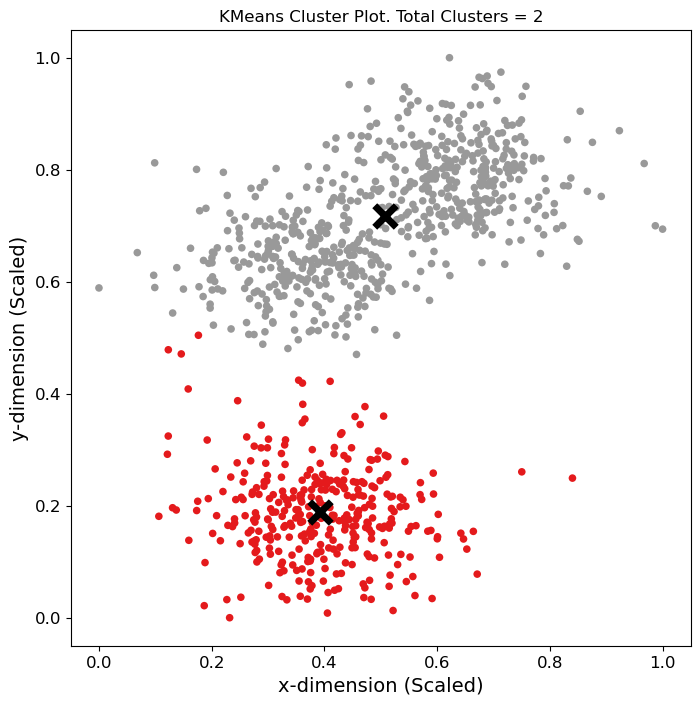

In [22]:
# Kmeans
k = 2 # Test the outputs with 2, 3 and 6 clusters to see the effects.
kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=0).fit(df_scaled_array)
cluster_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot
plt.figure(figsize=(8,8))
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], 
            marker='o', s=30, lw=0, alpha=1, c=cluster_pred, cmap = 'Set1', edgecolor=None)
plt.title(label = f"KMeans Cluster Plot. Total Clusters = {k}")
plt.xlabel("x-dimension (Scaled)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("y-dimension (Scaled)", fontsize=14)
plt.yticks(fontsize=12)

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker="x", s=240, linewidths=5, color="k", zorder=10)

Cluster_Plot = plt.show()
# Note that when using Kmeans in two dimensions the linearly separable characteristic of Kmeans is observed. 

#### Extracting KMeans Assigned Cluster Labels

In this section we will extract the labels of the calculated clusters. Note that the extracted cluster labels could be concatenated with the original dataset using the index. Recall that we need to excercise caution because if we had cleaned data (i.e., dropped) and not reset the index the dataframe of with the cluster labels and the one with the data will not match. 

In [23]:
df_cluster_label = pd.DataFrame(cluster_pred, columns=['kmeans_cluster_label']) # Creates a table with the cluster label.
# If for whatever reason you wanted to modify the clusters to start at 1 uncomment the line below.
#df_cluster_label['kmeans_cluster_label'] += 1 
# This modifies cluster "0" as cluster "1" and all other clusters up by 1.
df_cluster_label.head(5)

,kmeans_cluster_label
0,1
1,1
2,1
3,0
4,1


In [24]:
# Applying the cluster_label as a column in the scaled dataframe.
# Note that we could also assign the label to the non-scaled dataframe too.
df_data['kmeans_cluster_label'] = df_cluster_label # Adding column with cluster_labels to the full dataset dataframe.
df_data.head(5)

,x,y,label,kmeans_cluster_label
0,19.4473,18.0875,2,1
1,18.4589,16.5638,2,1
2,18.1724,14.4368,2,1
3,19.1031,10.1015,0,0
4,20.7778,18.2620,1,1


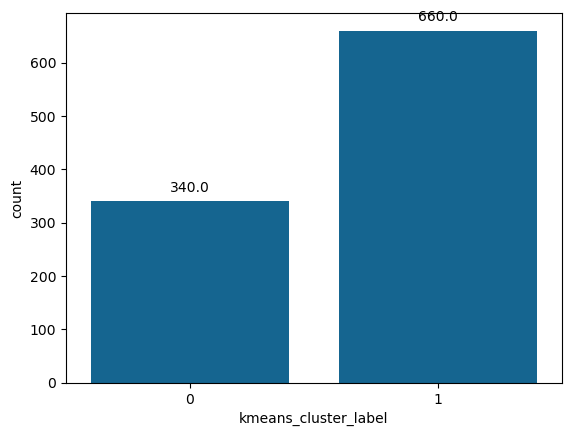

In [25]:
# We can calculate how many data points per each cluster.
cluster_count_figure = sns.countplot(x='kmeans_cluster_label', data = df_data)
for p in cluster_count_figure.patches:
    cluster_count_figure.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), 
                                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## DBSCAN Clustering Algorithm
[Return to Table of Contents](#Table-of-Contents)

DBSCAN is another commonly used clustering algorithms. It is a density based algorithm. Different to K-Means algorithm, the way the DBSCAN algorithm assigns a clusters is using a two parameters, density parameter called EPS or epsilon and a minimum sample of records in a cluster parameters called min_samples. The EPS value is a distance measure of how far a neighbor data point may be. If the data point closer than the EPS distance there is likelihood that they belong to the same cluster. The min_samples parameters defines the minimum number of neighbor data points before the algorithm assigns a cluster number.   

Once the two parameters are met the algorithm assigns clusters starting in 0. Clusters with assigned cluster number of -1 mean that the points did not meet either one or the two parameters. Datapoints in Cluster -1 are outliers to the parameters defined. This does not mean that they are statiscal outliers.

Depending on the values of the DBSCAN parameters, the following situations may occur:
- If the value of the EPS is too low or the min_samples in a cluster is too high, there may be a high likelihood that no set of datapoitns will be assigned a cluster and all of the datapoints are assigned cluster -1 and are considered outliers.
- If the value of the EPS is too high or the min_samples in a cluster is too low, there may be a high likelihood that all the datapoints will be assigned cluster 0 and belong to the same cluster.   
- In the optimal case, a good EPS value is selected and a good min_samples in a cluster is selected and the outputs provide useful clusters.

#### Optimal EPS
[Return to Table of Contents](#Table-of-Contents)

When using density based clustering algorithms one input that these algorithms require is for the user to define a density value. Even though the algorithms will accept any density value (e.g., EPS or Epsilon), the optimal value will produce the best results. In DBSCAN the most common method uses an Elbow method where the EPS is plotted against the number of samples. The inflection point can then be used to estimate the best EPS value.

Documentation References:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
- https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan
- https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [26]:
# This code creates the data to determine the optimal density value (EPS). 
neigh = NearestNeighbors(n_neighbors=2) # Defines the model to calculate nearest neighbors.
nbrs = neigh.fit(df_scaled_array) # Fits the data to the model.
distances, indices = nbrs.kneighbors(df_scaled_array) # Calculates the distances
distances = np.sort(distances, axis=0) # Sorts the distances
distances = distances[:,1]

In [27]:
# DataFrame for the "Samples vs. EPS", normalization/scaling and Optimal EPS.

# Creates a dataframe with the distances to be used in the plot.
df_eps_vs_samples = pd.DataFrame(distances, columns=['EPS'])
# Creates a column called "samples" for number of samples
df_eps_vs_samples['samples'] = df_eps_vs_samples.index

In [28]:
df_eps_vs_samples.head(5) # Showing the dataframe of the EPS and Samples.

,EPS,samples
0,0.0005,0
1,0.0005,1
2,0.0008,2
3,0.0008,3
4,0.0010,4


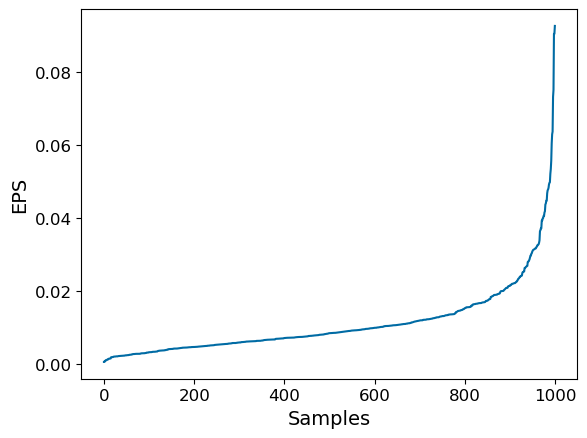

In [29]:
# Plots for EPS vs. the number of samples
plt.plot(distances);
plt.xlabel("Samples", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("EPS", fontsize=14)
plt.yticks(fontsize=12)
plt.show();

# The optimal EPS will be at the elbow, knee, inflection or maximum curvature point.

The calculation of the optimal EPS can be automated by calculating the EPS at the inflection point or the elbow. There are libraries such as the [Kneed](https://pypi.org/project/kneed/) which can be used to obtain the point of maximum curvature. In this case we will estimate the inflection point visually.

In the case above the optimal EPS is approximately 0.03. However, it may be important to use trial and error with various EPS around this value to decide the best outputs.

### Clustering with DBSCAN
[Return to Table of Contents](#Table-of-Contents)

The code in this section uses DBSCAN algorithm to create the clusters and plot the data. As a user the two parameters that we need to define are the EPS and min_samples. A good approach would be to start with the optimal EPS and a min_samples of 5 or 10% of the total number of records. The code below also creates and colors the clusters and which of the data points and the cluster it belongs to.

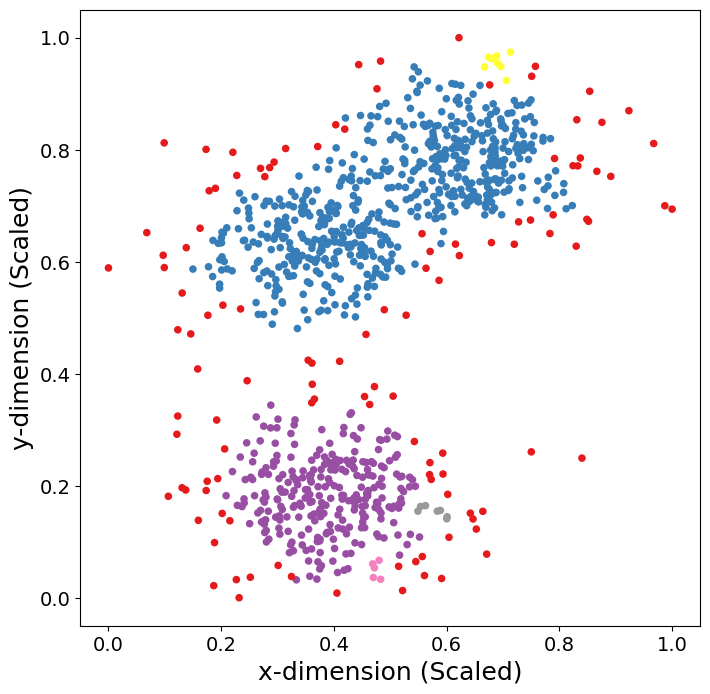

In [36]:
# DBSCAN clustering

EPS_value = 0.03 # Start with the estimated Optimal EPS value of 0.03.
# Test the outputs with 0.3 and 0.003.
min_samples_inacluster = 5 # Minimum number of points for creating a cluster.
# Test the outputs with 2, 10, 20, 100

# Define the model.  EPS is the max distance between points, and defines the density. 
cluster_pred = DBSCAN(eps= EPS_value, min_samples = min_samples_inacluster).fit_predict(df_scaled_array) 
clusters = unique(cluster_pred) # retrieve unique clusters
    
# Scatter plot
plt.figure(figsize=(8,8))
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], 
            marker='o', s=30, lw=0, alpha=1, c=cluster_pred, cmap = 'Set1', edgecolor=None)
#plt.title(label = f"KMeans Clusters Plot.  Total Clusters = {clusters.max()} with EPS = {EPS_value}")
plt.xlabel("x-dimension (Scaled)", fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("y-dimension (Scaled)", fontsize=18)
plt.yticks(fontsize=14)
plt.show()

When using the optimal EPS of 0.03 and a min_samples of 5 there seem to be 5 defined clusters with the red points being outliers. Let's confirm below.

#### Extracting DBSCAN Assigned Cluster Labels

In this section we will extract the labels of the calculated clusters. Note that the extracted cluster labels could be concatenated with the original dataset using the index. Recall that we need to excercise caution because if we had cleaned data (i.e., dropped) and not reset the index the dataframe of with the cluster labels and the one with the data will not match. 

In [37]:
df_cluster_label = pd.DataFrame(cluster_pred, columns=['dbscan_cluster_label']) # Creates a new table with the cluster labels.

# If for whatever reason you wanted to modify the clusters to start at 1 uncomment the line below.
#df_cluster_label['dbscan_cluster_label'] += 1 
# This modifies cluster "0" as cluster "1" and all other clusters up.
# Note that this will change the number of the outliers cluster (i.e., Cluster -1) to Cluster 0.

df_cluster_label.head(5)

,dbscan_cluster_label
0,0
1,0
2,0
3,1
4,0


In [38]:
# Applying the cluster_label as a column in the scaled dataframe.
df_cluster_label['dbscan_cluster_label'] = df_cluster_label # Adding column with cluster_labels to the full dataset dataframe.
df_cluster_label.head(5)

,dbscan_cluster_label
0,0
1,0
2,0
3,1
4,0


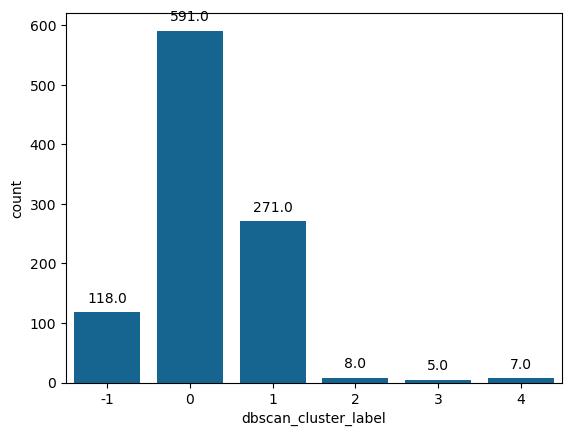

In [39]:
cluster_count_figure = sns.countplot(x='dbscan_cluster_label', data = df_cluster_label)
for p in cluster_count_figure.patches:
    cluster_count_figure.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# Note that points in cluster 0 do not belong to any cluster. 

In [40]:
# Same as before we can apply the cluster_label as a column in the scaled dataframe.
# Note that we could also assign the label to the non-scaled dataframe too.
df_data['dbscan_cluster_label'] = df_cluster_label # Adding column with cluster_labels to the full dataset dataframe.
df_data.head(5)

,x,y,label,kmeans_cluster_label,dbscan_cluster_label
0,19.4473,18.0875,2,1,0
1,18.4589,16.5638,2,1,0
2,18.1724,14.4368,2,1,0
3,19.1031,10.1015,0,0,1
4,20.7778,18.2620,1,1,0


In majority of the use cases, when deploying a Clustering model we would only use the results of one of the clustering algorithms. The above dataframe with the kmeans_cluster_label and the dbscan_cluster_label feature allows to compare the results if you wanted to do such.

# Concluding Remarks
[Return to Table of Contents](#Table-of-Contents)

Clustering algorithms such as Kmeans and DBSCAN can be used to group and cluster datapoints based on specific features. Both resulted in different clusters and you need to be aware of the geometry of your data to determine the best clustering algorithm. 
Implementation of other clustering algorithms would be similar to the process above.

For example, we have a customer segmentation problem and we have customer data on the household income and household spending. The data of these two features can be used to cluster and create groups of customers. The groups can then be analyzed individually to develop targeted ads that would be of more interest to the specific customers groups. Potentially these groups may look like, high income/high spending, low income/low spending, low income/high spending and high income/low spending. The final characteristics of the clusters or groups will depend on the algorithm and the parameters used.   

# Notebook End